# **Derretimiento del hielo en el Ártico**

### El calentamiento global y el Ártico
El calentamiento global es un hecho innegable que afecta a todo el planeta, sin embargo, hay lugares que pueden llegar a ser más sensibles a estos cambios y por tanto resultar más afectados en todo su ecosistema.
Uno de esos lugares es el Ártico. 

Ubicado en el hemisferio norte, es en su mayor parte un extenso océano cubierto de hielo. Es una zona de temperaturas extremas, usualmente por debajo de los 0°C, razón por la cual se mantiene helado la mayor parte del año.

<img src=https://i.pinimg.com/564x/d4/4b/75/d44b75f1e3461de77b287ec1b15d0dc0.jpg width="350"/> <img src=https://swoop-arctic.imgix.net/The-Arctic-1200.png width="300"/>

A pesar de ser un lugar alejado de las concentraciones de poblaciones, es esencial para regular la temperatura de todo el planeta. Sin embargo, esto corre peligro pues al igual que la temperatura del ártico influye en el resto del planeta, sucede lo mismo del otro sentido: las temperaturas del resto de la tierra influyen en la temperatura del ártico.
Esto quiere decir que actividades humanas que llevan al calentamiento global también calientan el ártico y este a su vez calienta más el resto del planeta.

<img src=https://static.dw.com/image/43353955_7.png width="350"/>

Para el ártico, el aumento de las temperaturas se traduce en una disminución del hielo que lo compone, pues, para que haya hielo, las temperaturas deben ser adecuadas, por debajo del punto de congelamiento y mantenerse estables para que el hielo se mantenga en el tiempo.

###¿Por qué es importante el hielo del Ártico?
Una de las razones por las que el hielo en el ártico es tan importante para todo el planeta es porque este, al ser blanco, refleja la mayor parte de la radiación solar, lo que significa que esta, a pesar de que ingresa a la tierra, es devuelta al espacio. Cuando el hielo disminuye, hay menos superficie blanca que refleje la radiación entonces solo quedan las oscuras aguas del océano, las cuales al ser oscuras absorben gran parte de la radiación solar que ingresa a la tierra, lo que se traduce en un aumento de la temperatura.

<img src=https://www.worldatlas.com/r/w768/upload/78/ad/59/untitled-design-47.jpg width="300"/>

El crecimiento del hielo del Ártico es un proceso bastante complejo que depende de muchos factores externos como corrientes oceánicas, corrientes de aire, radiación solar (efecto albedo), fuerza de Coriolis, entre otros.

<img src=https://live.staticflickr.com/65535/51063015912_ce92a87fd2_o.jpg width="550"/>




### Un modelo simple para el crecimiento del hielo

En términos generales, el crecimiento del hielo puede dividirse en dos tipos de crecimiento:
- Lateral
- Altura

En un principio se puede desarrollar un modelo simple para el crecimiento de la altura del hielo, el cual tiene los siguientes supuestos:
- El área del hielo es constante en el paso del tiempo, de 1m cuadrado
- La temperatura del aire es constante y está por debajo del punto de congelamiento del agua
- La temperatura del agua es mayor a su punto de congelamiento
- El crecimiento del hielo depende únicamente de las temperaturas del agua y del aire (que son constantes) y de la altura del hielo un paso de tiempo antes.

<img src="https://plus.maths.org/issue46/features/wadhams/freezing.gif"/>

En primer lugar se tiene que el agua, al tener mayor temperatura, transfiere calor al aire a través del hielo, por lo que la ley de Fourier de conducción del calor establece que la tasa de transferencia de calor está dada por el ecuación diferencial:

$$\frac{dQ}{dt}= \frac{k(t_w-t_a)}{h}$$

Donde Q es calor transferido, k es la conductividad térmica del hielo, tw y ta son la temperaturas del agua y del aire y h es la altura del hielo.

La transferencia de calor del agua al aire hace que la primera pierda calor lo que significa que va a congelarse y su masa cambia. Esto presenta una relación lineal:
$$Q = Lm$$
Donde L es el calor latente del agua (cantidad de calor que debe perder para congelarse) y m es la masa, pero al establecer que $m = V*D$ se tiene que el área es 1 y la densidad no cambia entonces:
$$Q = L * D * h$$
Despejando h es posible llegar a que el cambio en la altura del hielo por la variación del calor está dado por:
$$\frac{dh}{dQ}=\frac{1}{LD}$$
Ahora para determinar el cambio en la altura del hielo en el tiempo:
$$\frac{dh}{dt}= \frac{k(t_w-t_a)}{LDh}$$

Cuya solución es la función:
$$h(t)=\sqrt{h_0^2+\frac{2k(t_w-t_a)t}{LD}}$$

Este simple modelo sirve para determinar características del hielo, sin embargo, no es muy realista y por lo tanto no brinda información relevante para tomar acciones.

Aquí se asume que las temperaturas del agua y del aire son constantes, cosa que en realidad no es cierta puesto que el Ártico también tiene estaciones, invierno y verano, en las cuales la temperatura varía y por tanto el comportamiento del crecimiento del hielo cambia.

Ahora, teniendo esto en cuenta, el modelo se adecúa de forma que las temperaturas varíen a medida que pasa el tiempo.


### Desarrollo del modelo
1. **Obtener las temperaturas del agua y del aire:** para esto se tomó de referencia la información de la investigación *Mathematical modeling of Arctic sea ice freezing and melting based on nonlinear growth theory*, cuyas gráficas sobre estas temperaturas se asemejan a una función gausiana y una función seno.

<img src="https://drive.google.com/uc?export=view&id=18feAb0KjfDkOdZEuS7Z1HYVjbFs0Q-BB" width="650"/>

Con esto en mente, se crean estas funciones adecuando algunas partes para qur se pueda obtener los valores de las temperaturas esperados, además se aumenta la temperatura máxima con el paso de los años debido al cambio climático. La temperatura está dada por meses los cuales son 600, es decir, la temperatura de cada mes durante 50 años.

Según la información brindada por el documento Global Linkages A graphic lookat the changing Artic, publicado en 2019 por el Programa Ambiental de las Naciones Unidas, las temperaturas de invierno en el Ártico se incrementarían de 3°C a 5°C para la mitad del siglo (relativo a los niveles entre 1986 y 2005), lo que significa que ese aumento se da en un intervalo de 50 años aproximadamente. Por esta razón se hacen las respectivas modificaciones al código.

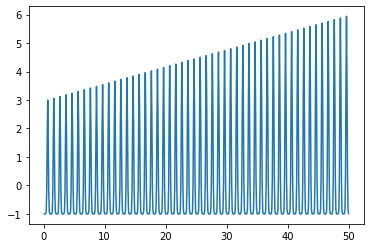

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def temperature(x, a, x0, sigma, n):
    x0 = 8 +(n*12)
    return a*(1+(0.015)*n)*np.exp(-(x-x0)**2/(2*sigma**2))

time = np.linspace(1,12*50,600)
sea_t= np.zeros(len(time))
for i in range(50):
  sea_t = sea_t + temperature(time, 4, 8, 1.1,i)

sea_t = sea_t-1

plt.plot(time/12,sea_t)

(0.0, 12.0)

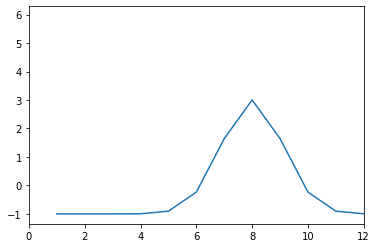

In [ ]:
plt.plot(time, sea_t)
plt.xlim(0,12)

Para obtener los datos de la temperatura del aire se lleva a cabo un proceso similar, sin embargo la función usada para modelar esta temperatura es una función seno, de igual forma se aumenta el máximo a medida que para el tiempo, la única diferencia es que la mínima temperatura no regresa sino que también disminuye con el tiempo.

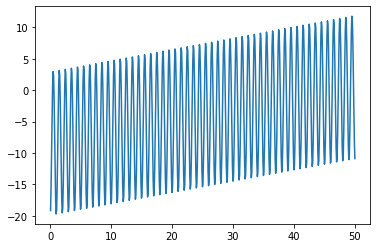

In [ ]:
air_t = np.sin(2*np.pi*time/12-8)*11.5
air_t = air_t - 8.5 +(0.015)*time
#plt.xlim(0,24)
plt.plot(time/12, air_t)

(0.0, 24.0)

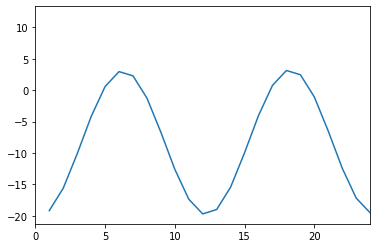

In [ ]:
plt.plot(time, air_t)
plt.xlim(0,24)

Las listas de estas temperaturas se usan para ingresar los datos para modelar el crecimiento del hielo en el tiempo. El resto de las constantes como densidad, calor latente y conductividad térmica fueron tomadas de las siguientes fuentes:
- https://hypertextbook.com/facts/2002/EdwardLaValley.shtml
- https://www.engineeringtoolbox.com/ice-thermal-properties-d_576.html
- https://www.britannica.com/science/seawater/Density-of-seawater-and-pressure


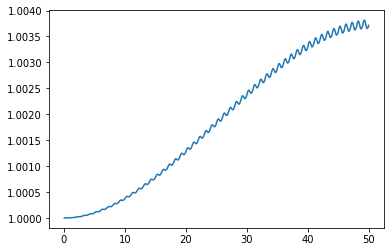

In [ ]:
import math
k = 2.5
h0 = 1
t = 0
d = 1028.13
l = 334000
ice_growth = np.zeros(12*50)
ice_growth[0] = h0

for i in range(1,len(ice_growth)):
  ice_growth[i] = math.sqrt((ice_growth[i-1])**2+(2*k*(sea_t[i-1]-air_t[i-1])*t)/(l*d))
  t= t+1

plt.plot(time/12,ice_growth)
#plt.xlim(0,12)

Con estos resultados es posible encontrar información relevante que se puede corroborar en el mundo real. Lo primero que se puede apreciar es que la altura del hielo no crece en todo momento sino que varía entre estaciones lo cual es más correcto con el funcionamiento real del hielo. Lo siguiente que se puede apreciar es que el crecimiento del hielo, que a pesar de que presenta una tendencia al alza de formar general, es posible notar que mientras más pasa el tiempo y mayor es la temperatura, el aumento en la altura del hielo disminuye lo que podría significar que esta posee un máximo, de forma que si la temperatura sigue aumentando, el hielo empezará a derretirse más de lo que crece, causando que la curva sea ahora decreciente.

### Profundizando en el modelo
A pesar de que este modelo puede servir para reconocer características básicas del comportamiento del hielo, no brinda información completa sobre la disminución del hielo en el Ártico. Al principio se mencionó que el crecimiento del hielo también podía ser lateral, cosa que en el modelo anterior se omitió por completo asumiendo que el derretimiento del hielo solo se daba de forma vertical, lo cual no es cierto.

La altura del hielo llega a ser esencial para la preservación del Ártico pues el grosor de las banquisas hace que estas se mantengan completas y por esto se derritan menos. Esto significa que mientras más delgadas sean las capas de hielo en el Ártico, serán más propensas a romperse y esto tiene efectos devastadores por varios aspectos.

En teoría, el modelo demuestra que el hielo más delgado crece más rápido mientras que si su altura aumenta, el ritmo al que crece se desacelera.
Uno de ellos es el hecho de que las banquisas son los medios por los cuales los osos polares obtienen su alimento y estas al disminuir su tamaño por desprenderse y ser tan delgadas, no pueden ser usadas por los osos así que se les dificulta en gran medida obtener su comida.

<img src="https://s.abcnews.com/images/International/polar-bear-01-file-gty-jef-210908_1631122552506_hpMain_16x9_992.jpg" width="350"/>
<img src="https://ichef.bbci.co.uk/news/1024/branded_news/12DF7/production/_113530377_bears_kt-miller.jpg" width="350"/>


### Proponer un nuevo modelo
Como se mencionó anteriormente, es posible darse cuenta de que la variación en el tamaño del hielo no es solo vertical sino que también es lateral. Esta aclaración es importante para desarrollar modelos más precisos, por lo que la siguiente cuestión es encontrar la relación entre ambos tipos de derretimiento para incluirlas en un nuevo modelo. Se han hecho múltiples propuestas sobre esta inclusión

El derretimiento lateral no se modela de forma aislada como es posible hacerlo con el vertical. Esto puede ser debido a que las variables que determinan ese cambio también funcionan de forma vertical, es decir, en su expresión más simple, la temperatura del agua (que está por debajo del hielo) y la temperatura del aire (que está por encima del hielo), afectan de manera directa la altura del hielo, que fue lo que se planteó con el modelo inicial. 

Ahora, para determinar el crecimiento lateral del hielo es posible notar que lo que se ha tratado de llevar a cabo es una unificación en la que se trata de obtener no un área sino el volumen total del hielo. De esta forma, la inclusión del crecimiento lateral del hielo se incluye como una tasa de crecimiento que se obtiene del cambio en la temperatura del agua.

Lateral melt rate:
$$W_{lat} = m_1\Delta T^{m_2}$$

Donde $\Delta T$ es la diferencia en la temperatura de la superficie del agua del congelamiento.

$$\frac{dA}{dt}=-W_{lat}\frac{\pi}{\alpha L}A$$
Donde $A$ es la concentración del hielo, $L$ es el diámetro del hielo, ${\alpha}$ es un parámetro geométrico de la forma del hielo que representa su no - circularidad.

Hunke (2014) found that in a coupled climate model, lateral melting may be important, despite being a small term in the mass budget, because of the sensitivity of sea ice to thermodynamic processes, especially in thin ice categories. Model experiments showed that although lateral and basal melt are both driven by heat in the ocean, they may respond to model changes in different ways. Skyllingstad et al. (2005) developed an large-eddy simulation model for leads which showed that freshwater stratification in leads plays a major role in controlling lateral melting. It is clear that further field data are required to illuminate the relationships of physical controls with lateral and basal melt rates, as existing empirical relationships (Perovich, 1983) have large uncertainties as a result of limited observations.